# Social Findings from *Keys to the VIP*

**Show Information**<br>
Length: 3 seasons, 13 episdoes per season <br>
Judges: Peachez (The Jock), Sheldon (Mysteriously Coy), Chris (Nice Guy), and Alen (Master of Pick-up Analysis) <br>
Available on [Amazon Prime](https://www.amazon.com/gp/video/detail/B00BI4CJJM/ref=atv_dp_share_cu_r) and [YouTube](https://www.youtube.com/watch?v=pcwaTD2jJXo&list=PLwyhDyJ3VORYy2eXTD1vrA5k2UxiuvmS6)

In [1]:
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/pcwaTD2jJXo", width="560", height="315")

***

**Are you a guy that's trying to wade through the complicated world of dating? Are you a woman who wants to know why guys are so weird at the bar? Or are you someone who's interested in the psychology behind social interactions?**

Enter *Keys to the VIP*, a comedy reality dating show based in Canada that shines a light on social interactions. In the show, viewers can see and hear (just about) everything as guys are asked to go into various clubs in order to attract woman under the guise of various challenges given to them by the judges. For the viewing audience, the experience is akin to eavesdropping, but without the risk of being caught. And the benefit is that we get a nearly unbiased glimpse into the conversastions that take place in bars and clubs.

There are couple of ways that people may think about *Keys to the VIP*. Either the show is: <br>
 - A sick, twisted exhibition showcasing the myriad ways in which men psychologically manipulate (i.e. seduce) woman into giving up their numbers.
 - A fascinating, authentic line of sight into social dynamics that explores questions such as: how do people respond to different social cues such as body language, tone of voice, choice of words, and timing?
 - An enlightening expose for guys as to how to most effectively interact with women (and people in general) to give their love life a boost.

To some extent, all of the aforementioned views are true. However, regardless of your point of view, one must concede that *Keys to the VIP* provides an unprecedented level of access into the world of dating. To that end, I thought it would be interesting to log each of the **239 approaches from all 39 episodes** and run some analytics to test some of my hyptheses. Of course, there are a multitude of insights to be gleaned. Therefore, I encourage you to download the SQLite repository and do some digging of your own. Let's check it out!

***

## Table of Contents

<a href='#nice_guys_dont_finish_last'>Hypothesis #1: Nice Guys Don't Finish Last</a><br>
<a href='#alpha_males_matter'>Hypothesis #2: Alpha Males Matter</a><br>
<a href='#dont_buy_girl_drink'>Hypothesis #3: Buying drinks for a girl is a waste of cold, hard cash</a><br>
<a href='#iso'>Hypothesis #4: Iso, Iso, Iso</a><br>
<a href='#guys_need_direction'>Hypothesis #5: Guys Need Direction</a><br>

***

In [2]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from sqlalchemy import update, select, func, column, and_, asc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

app = Flask(__name__)
db = 'sqlite:///C:\\Users\\am522379\\OneDrive\\keys_to_the_vip\\keys_to_the_vip.db'
app.config['SQLALCHEMY_DATABASE_URI'] = db
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False

db = SQLAlchemy(app)
conn = db.engine.connect()
episodes = db.Table('Episodes', db.Model.metadata, autoload=True, autoload_with=db.engine)
contestants = db.Table('Contestants', db.Model.metadata, autoload=True, autoload_with=db.engine)
challenges = db.Table('Challenges', db.Model.metadata, autoload=True, autoload_with=db.engine)
approaches = db.Table('Approaches', db.Model.metadata, autoload=True, autoload_with=db.engine)

total_approaches = db.session.query(approaches).count()

<a id='nice_guys_dont_finish_last'></a>
## Hypothesis #1: Nice Guys Don't Finish Last

Do nice guys finish last or do assholes come out on top? As Sheldon once said, "There's a theory out there that if you treat a girl like dirt, she'll stick to you like mud." While that is an utterly crude and unacceptable philosophy, we've all heard that some girls gravitate towards assholes. I, however, think that woman prefer nice guys, particularly those with an edge. To assess the hypothesis, I rated each guy as Nice Guy, Neutral, or Asshole based on each contestants profile and the judges' commentary.

In [25]:
success, sample_size = [], []
personalities = ['Nice Guy', 'Neutral', 'Asshole']

for personality in personalities:
    number_personality = db.session.query(approaches).filter(approaches.c.Result=='Number'
                                                            ).join(contestants
                                                                  ).filter(contestants.c.Personality==personality).count()
    
    sample_personality = db.session.query(approaches
                                         ).join(contestants
                                               ).filter(contestants.c.Personality==personality).count()
    
    success_rate = round((number_personality/sample_personality)*100)
    sample_size.insert(len(sample_size), sample_personality)
    success.insert(len(success), success_rate)

> **NOTE**: I measured success by determining the percentage of approaches the resulted in a number. Besides approaches resulting in a number, the other two approach outcomes I mapped are:
 - Reject: A girl doesn't give away her number (or dismisses the guy).
 - Nothing: The guy has a conversation with his interest and ends the conversation on his own.  

**Total Number of Approaches: Nice Guy, 89; Neutral, 98; Asshole, 52**


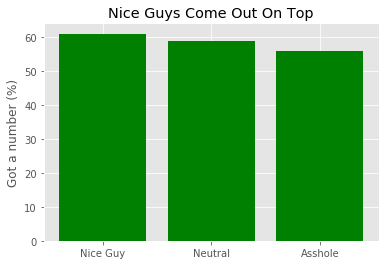

In [27]:
print(f'**Total Number of Approaches: Nice Guy, {sample_size[0]}; Neutral, {sample_size[1]}; Asshole, {sample_size[2]}**')
x_pos = np.arange(len(personalities))
plt.title(f'Nice Guys Come Out On Top')
plt.bar(x_pos, success, color='green')
plt.ylabel('Got a number (%)')
plt.xticks(x_pos, personalities)
plt.show()

#### Hypotheses: CONFIRMED

***

<a id='alpha_males_matter'></a>
## Hypothesis #2: Alpha Males Matter

Strong, dominant, and the most perfect physical representation of the the male form factor, alpha males would be expected to do fairly well. Just ask Peachez, one of the judges who's characterized as an "All-Star, jock-inspired seduction specialist". He lives for the alpha male contestant and as a result, tends to bet on them to win. The contestant was deemed to be an alpha male based on subjective opinion and the judges' commentary. Let's see if they came out on top. 

In [29]:
success, sample_size = [], []
alpha = [1, 0]
percentages = []

for a in alpha:
    number_alpha = db.session.query(approaches).filter(approaches.c.Result=='Number'
                                                      ).join(contestants
                                                            ).filter(contestants.c.IsAlphaMale==a).count()
    sample_alpha = db.session.query(approaches
                                   ).join(contestants
                                         ).filter(contestants.c.IsAlphaMale==a).count()
    
    success_rate = round((number_alpha/sample_alpha)*100)
    sample_size.insert(len(sample_size), sample_alpha)
    success.insert(len(success), success_rate)

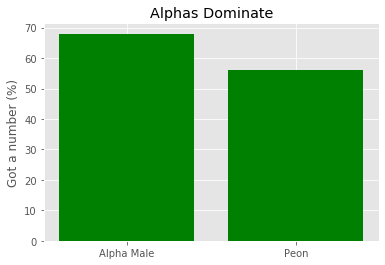

In [31]:
x_pos = np.arange(len(alpha))
plt.title(f'Alphas Dominate')
plt.bar(x_pos, success, color='green')
plt.ylabel('Got a number (%)')
plt.xticks(x_pos, ['Alpha Male', 'Peon'])
plt.show()

### What About Looks?

Given that alpha males are plucked from the top of the genetic tree, why not dig deeper and see if looks play a factor? Of course, the alphas were all attractive but keep in mind that not all good-looking guys are alpha males. Looks were judged on a 1-3 scale (1 = Danny Devito and 3 = Ryan Gosling).

In [33]:
success, sample_size = [], []
looks = [1, 2, 3]

for i in looks:
    number_looks = db.session.query(approaches
                                   ).filter(approaches.c.Result=='Number'
                                           ).join(contestants
                                                 ).filter(contestants.c.Looks==i).count()
    sample_looks = db.session.query(approaches
                                   ).join(contestants
                                         ).filter(contestants.c.Looks==i).count()
    
    success_rate = round((number_looks/sample_looks)*100)
    sample_size.insert(len(sample_size), sample_looks)
    success.insert(len(success), success_rate)

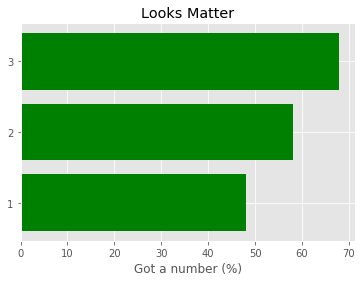

In [34]:
x_pos = np.arange(len(looks))
plt.title(f'Looks Matter')
plt.barh(x_pos, success, color='green')
plt.xlabel('Got a number (%)')
plt.yticks(x_pos, looks)
plt.show()

### Looks and game are mutually exclusive

While looks clearly matter, it's important to note that even those guys deemed less attractive can still have game, bringing in a number close to 50% of the time. In fact, out of the 58 approaches made by the less genetically gifted, they received a number (23 times) more than they got rejected (18 times). A prime example is Mike "The Magician". In the episode, he goes up against "Hot Body" Jason, a studly male stripper who doesn't need any social awareness to garner interest from beautiful women. While it looks like an uphill battle for the Magician, he is able to pull out a win. Not because of his looks, but because of his magic and his personality. Let's check out Mike below...Salute!

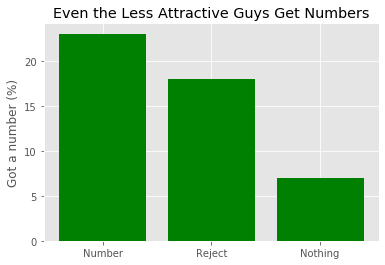

[23, 18, 7]


In [36]:
results = ['Number', 'Reject', 'Nothing']
data = []

for r in results:
    number = db.session.query(approaches).filter(approaches.c.Result==r
                                                ).join(contestants
                                                      ).filter(contestants.c.Looks==1).count()
    data.insert(len(data), number)
    
x_pos = np.arange(len(results))
plt.title(f'Even the Less Attractive Guys Get Numbers')
plt.bar(x_pos, data, color='green')
plt.ylabel('Got a number (%)')
plt.xticks(x_pos, results)
plt.show()
print(data)

In [10]:
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/U8-2f2uxOcI?start=421", width="560", height="315")

#### Hypotheses: CONFIRMED

***

<a id='dont_buy_girl_drink'></a>
## Hypothesis #3: Buying drinks for a girl is a waste of cold, hard cash

Coming into the show, I always viewed buying drinks for a girl to be a waste of money; just because you buy someone a drink doesn't mean they're interested. After all, some people are in the club to hang out with their friends and nothing else. But if someone offers to buy them a drink, they're not going to say no, are they? Not to mention that offering to buy a girl a drink is a rather forced way of talking to her. It also may inject feeling of reciprocity whereby the girl may give you her number to repay you for getting her a drink. No authentic feelings necessary. Unfortunately, the ultimate results will come with the aforementioned caveat: a number might be obtained just because the guy bought the girl a drink. 

In [38]:
success, sample_size = [], []
is_drink_purchased = [0, 1]

for i in is_drink_purchased:
    number_drinks = db.session.query(approaches).filter(approaches.c.Result=='Number'
                                                        , approaches.c.IsDrinkPurchased==i).count()
    sample_drinks = db.session.query(approaches).filter(approaches.c.IsDrinkPurchased==i).count()
    
    success_rate = round((number_drinks/sample_drinks)*100)
    sample_size.insert(len(sample_size), sample_drinks)
    success.insert(len(success), success_rate)

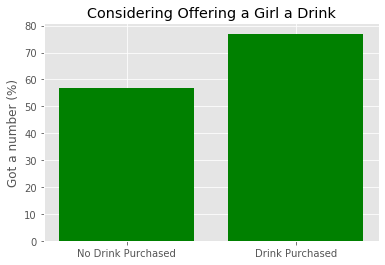

In [40]:
x_pos = np.arange(len(is_drink_purchased))
plt.title(f'Considering Offering a Girl a Drink')
plt.bar(x_pos, success, color='green')
plt.ylabel('Got a number (%)')
plt.xticks(x_pos, ['No Drink Purchased', 'Drink Purchased'])
plt.show()

#### Hypotheses: REJECTED

***

<a id='iso'></a>
## Hypothesis #4: Iso, Iso, Iso

How do you develop the best connection with that hottie across the bar? When you're able to talk to them alone, without the influence and distraction that might come with their friend group. Since Keys to the VIP contestants are supposed to be proficient in attracting women, I figured that the odds of getting a number went up when isolating their love interest. For the purposes of the analysis, I considered isolation to be anytime the couple were relatively isolated from the group or were able to hold a conversation without influence from the friend group.

In [13]:
success, sample_size = [], []
is_iso = [0, 1]

for i in is_iso:
    number_iso = db.session.query(approaches).filter(approaches.c.Result=='Number'
                                                     , approaches.c.IsIso==i).count()
    sample_iso = db.session.query(approaches).filter(approaches.c.IsIso==i).count()
    
    success_rate = round((number_iso/sample_iso)*100)
    sample_size.insert(len(sample_size), sample_iso)
    success.insert(len(success), success_rate)

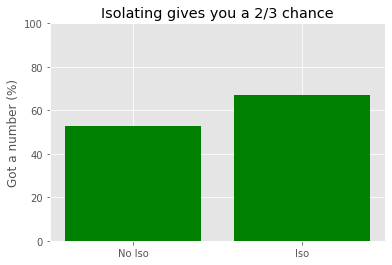

In [14]:
x_pos = np.arange(len(is_iso))
plt.bar(x_pos, success, color='green')
plt.title(f'Isolating gives you a 2/3 chance')
plt.ylabel('Got a number (%)')
plt.ylim(ymax = 100, ymin = 0)
plt.xticks(x_pos, ['No Iso', 'Iso'])

plt.show()

### Does the size of the set matter?

In [15]:
success, sample_size = [], []

set_count = conn.execute(select([column('SetCount')]).select_from(approaches).distinct()).fetchall()
set_count = sorted([count[0] for count in set_count])

for count in set_count:
    number_set = db.session.query(approaches).filter(approaches.c.SetCount==count
                                                     , approaches.c.Result=='Number').count()
    sample_set = db.session.query(approaches).filter(approaches.c.SetCount==count).count()
   
    success_rate = round((number_set/sample_set)*100)
    sample_size.insert(len(sample_size), sample_set)
    success.insert(len(success), success_rate)

corr = round(np.corrcoef(x=set_count, y=success)[0][1] * 100,2)

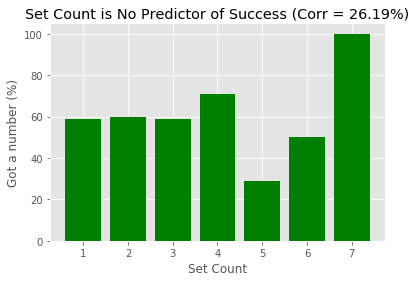

In [16]:
x_pos = np.arange(len(set_count))
plt.bar(x_pos, success, color='green')
plt.title(f'Set Count is No Predictor of Success (Corr = {corr}%)')
plt.ylabel('Got a number (%)')
plt.xlabel('Set Count')
plt.xticks(x_pos, set_count)

plt.show()

> **NOTE**: There was only one guy crazy enough to try and speak to 7 people at once: Steve a.k.a Sphinx. Not only did the "Human Action Figure" manage to introduce himself to such a large group, but he fended off one hell of a mother hen in the process.

In [17]:
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/aigyldri5do?start=1121", width="560", height="315")

#### Hypotheses: CONFIRMED

***

<a id='guys_need_direction'></a>
## Hypothesis #5: Guys Need Direction

Many women don't realize how intimidating it can be for a guy to approach a beautiful girl. Beyond all of the evolutionary biology that makes the situation tense, there's also the thought they need the perfect introduction. Many guys are handcuffed by thoughts such as: What am I going to say? How is she going to react? What will her friends think? Validity of the thoughts aside, I hypothesize that guys who are given direction are more likely to succeed. There are many challenges presented to the contestants. There are three challenges that give the contestant free reign: Freestyle, Seduction School, and The Routine. To that end, approaches under these challenges will serve as my comparison group.

In [18]:
success, sample_size = [], []
freestyles = (10 , 15, 51)

number_no_dir = db.session.query(approaches
                                ).filter(approaches.c.Result=='Number'
                                        ).join(challenges
                                              ).filter(challenges.c.ID.in_(freestyles)).count()

sample_no_dir = db.session.query(approaches
                                ).join(challenges
                                      ).filter(challenges.c.ID.in_(freestyles)).count()

number_dir = db.session.query(approaches
                             ).filter(approaches.c.Result=='Number'
                                     ).join(challenges
                                           ).filter(challenges.c.ID.notin_(freestyles)).count()

sample_dir = db.session.query(approaches
                             ).join(challenges
                                   ).filter(challenges.c.ID.notin_(freestyles)).count()

success = [int((number_no_dir/sample_no_dir)*100), int((number_dir/sample_dir)*100)]
sample_size = [sample_no_dir, sample_dir]

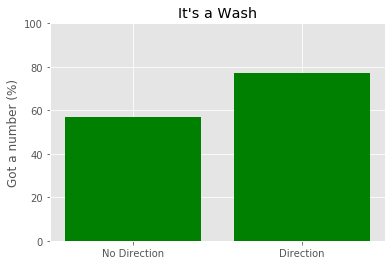

In [42]:
x_pos = np.arange(len(success))
plt.bar(x_pos, success, color='green')
plt.title(f'It\'s a Wash')
plt.ylabel('Got a number (%)')
plt.ylim(ymax = 100, ymin = 0)
plt.xticks(x_pos, ['No Direction', 'Direction'])

plt.show()

### Which challenge was the best/worst?

In [20]:
challenge_types = db.session.query(challenges).all()

In [21]:
d={}
result, results = [], []

for challenge in challenge_types:
    number_challenge = db.session.query(approaches).filter(approaches.c.Result=='Number').join(challenges).filter(challenges.c.ID==challenge[0]).count()
    sample_challenge = db.session.query(approaches).join(challenges).filter(challenges.c.ID==challenge[0]).count()

    result = [challenge[1], challenge[2], round((number_challenge/sample_challenge)*100), sample_challenge]
    results.insert(len(results), result)

sort_challenges = sorted(results, key=lambda x: x[2], reverse=True)
df = pd.DataFrame(sort_challenges, columns =['Name', 'Description', 'Success Rate (%)', 'Approaches']) 

### The Most Successful Challenges

In [44]:
df.head(10)

,Name,Description,Success Rate (%),Approaches
0,Starving Artist,Convince girl that you are unemployed and live...,100,2
1,The Palm Reader,Initiate pick-up with a palm reading,100,4
2,Quiet on the Set,Ask woman to be quiet as you listen to song th...,100,2
3,Kiss Close,Complete pick-up with a kiss,100,4
4,Shaken Not Stirred,Create a drinking game that leads to a kiss,100,4
5,The Ex-Lover,Seduce a woman while fending off ex-lover,100,2
6,The Date,Convince girl to go with him on date,100,2
7,Jealousy Angle,Recruit a woman to make your ex jealous,100,2
8,Speed Dial,Get number in less than a minute,90,10
9,Angry Girlfriend,Get woman's number while fending off angry gir...,83,6


>**NOTE**: I broadened the range to 10 challenges to shift the focus from those challenges with a small sample size.

**The Kiss Close** - undoubtedly the most difficult challenge - was used twice in the entire show. Unbeleivably, all 4 contestants succeeded in their own right. Let's take a peek at one of those successful challenges, where Andrew (a.k.a. The Dungeon Master) pulls off one of the most unusual and remarkable pick-ups in history (yes, history).

In [48]:
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/EOsJzR8o_vM?start=959", width="560", height="315")

### The Least Successful Challenges

In [52]:
df.tail(10)

,Name,Description,Success Rate (%),Approaches
45,3 Approaches,Approach 3 different women,0,6
46,The Dancer,Seduce woman onto dance floor without saying a...,0,2
47,The Hyena,Obtain number while fending off opponent,0,2
48,The Box Out,Initiate pick up by boxing out obstacle from t...,0,2
49,Friend Destroyer,Obtain number while fending off friend destroyer,0,2
50,She's So Silly,Make a woman laugh at her friends,0,2
51,Body Shots,Initiate body shots at the bar,0,2
52,Opinion Opener,Open set with opinion,0,2
53,The Routine,Demonstrate textbook seducation routine,0,2
54,Point Taken,"Ask group of girls to rate your looks, persona...",0,2


In one of the most brutal episodes in the entire series, Yakov "The Trapper" goes up against "Cocoa Butter" Chris. Both guys were subjected to two of the ten least successful challenges: **3 Approaches** and **The Hyena**. Clearly, neither of them were able to come away with the number as Yakov mistakenly thought he was at a rave the entire night and "Cocoa Butter" Chris has the personality of a tomato. Enjoy (or not).

In [53]:
from IPython.display import IFrame

IFrame(src="https://www.youtube.com/embed/K71nF8sD-do?start=87", width="560", height="315")

#### Hypotheses: Rejected

***

<a id='final_thoughts'></a>
## Final Thoughts

Navigate to the reviews on [IMDB](https://www.imdb.com/title/tt0839004/) and you'll find that *Keys To The VIP* is extremely polarizing. If it wasn't patently obvious, I found the show to be extremely entertaining. More importantly, I enjoyed the psychological aspect of the show since I could dive into each interaction and observe "genuine" human interactions in a relatable social context. It may be said that the concept of picking-up women in the fashion exhibited throughout the show is male chauvanist in nature. To some extent, you'd be right. However, it's also true that due in part to our evolutionary biology, many societal norms throughout the world continue to put the pressue on the guy to make the first move in an effort to attract his love interest. Guys and girls are complicit in this allowing these norms to persist. As a result, guys tend to look for ways to present themselves in the best light possible, and women carry out a similar kind of analysis. Obviously, the line can skew too far to the side of rogue manipulation, where the gentleman presents himself as someone who he really isn't. But for those who are able to appropriately demonstrate the best of themselves in an effort to attract a partner, they will be in the best position to obtain the Key to the VIP.